## Environment initialization

In [1]:
import scanpy as sc
import omicverse as ov

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

data_dir = './data'
out_dir = './output'


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


In [2]:
# import dataset
geneExp_raw = pd.read_csv(f'{data_dir}/CordBlood_normalized_counts.csv', index_col=0)

# subset the dataset
geneExp_raw = geneExp_raw.iloc[:11000, ]
# transpose dataset for WGCNA
geneExp = geneExp_raw.T

# Rename the 'Unnamed: 0' column to 'sample_id'
#geneExp.rename(columns={'Unnamed: 0': 'sample_id'}, inplace=True)

geneExp.head()

ENSG00000000003  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
CB0002        18.700101       958.135416       558.953871       292.069612   
CB0004        11.108820       942.034462       522.670970       336.711194   
CB0007        13.543689       838.637359       502.957517       237.391785   
CB0009         6.125473       662.011178       550.593386       293.710772   
CB0011        17.294677       827.330446       531.730139       375.506407   

        ENSG00000000938  ENSG00000000971  ENSG00000001036  ENSG00000001084  \
CB0002     11682.138902       109.603726       178.323938      4929.373820   
CB0004      9906.793608       275.887517       332.796581      7068.661945   
CB0007      5610.355536        65.117282       170.568928      6045.743623   
CB0009      7108.250619        47.492913       208.704800      6035.986913   
CB0011      6357.607149        64.556201       222.186897      6607.340893   

        ENSG00000001167  ENSG00000001460  ...  ENSG00000171109  \
CB0002      1537.903802        47.533544  ...       989.173675   
CB0004      1450.980411        55.877120  ...      1521.232364   
CB0007      1334.540721        49.460784  ...      1052.207464   
CB0009      1409.185477        62.188367  ...       898.329888   
CB0011      1469.391387        31.582808  ...       712.900842   

        ENSG00000171115  ENSG00000171116  ENSG00000171119  ENSG00000171121  \
CB0002      1810.626313        27.214564         0.000000        64.082080   
CB0004      1833.073456         0.000000         1.116096        68.367573   
CB0007      2334.592998        38.391687         3.742494        87.391469   
CB0009      2419.780000         0.000000         1.939010        58.165819   
CB0011      2339.447537        33.096747         9.865461        82.943820   

        ENSG00000171126  ENSG00000171130  ENSG00000171132  ENSG00000171135  \
CB0002         6.700116       259.632016       324.435831       179.649534   
CB0004        13.154034       327.647619       500.504183       193.959588   
CB0007        10.873117       363.983502       445.256124       197.530812   
CB0009        19.513188       482.457699       385.632639       204.895889   
CB0011        18.399846       445.232171       354.202273       237.835653   

        ENSG00000171148  
CB0002      1581.610942  
CB0004      1646.877881  
CB0007      1236.566497  
CB0009      2157.637625  
CB0011      2122.489217  

[5 rows x 11000 columns]

In [4]:
# Setting up the PyWGCNA object
pyWGCNA = ov.bulk.pyWGCNA(name='CB',
                          species='homo sapiens',
                          geneExp=geneExp,
                          outputPath='GE_', # corresponds to analysis
                          save=True)
pyWGCNA.geneExpr.to_df().head()

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


ENSG00000000003  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
CB0002        18.700101       958.135416       558.953871       292.069612   
CB0004        11.108820       942.034462       522.670970       336.711194   
CB0007        13.543689       838.637359       502.957517       237.391785   
CB0009         6.125473       662.011178       550.593386       293.710772   
CB0011        17.294677       827.330446       531.730139       375.506407   

        ENSG00000000938  ENSG00000000971  ENSG00000001036  ENSG00000001084  \
CB0002     11682.138902       109.603726       178.323938      4929.373820   
CB0004      9906.793608       275.887517       332.796581      7068.661945   
CB0007      5610.355536        65.117282       170.568928      6045.743623   
CB0009      7108.250619        47.492913       208.704800      6035.986913   
CB0011      6357.607149        64.556201       222.186897      6607.340893   

        ENSG00000001167  ENSG00000001460  ...  ENSG00000171109  \
CB0002      1537.903802        47.533544  ...       989.173675   
CB0004      1450.980411        55.877120  ...      1521.232364   
CB0007      1334.540721        49.460784  ...      1052.207464   
CB0009      1409.185477        62.188367  ...       898.329888   
CB0011      1469.391387        31.582808  ...       712.900842   

        ENSG00000171115  ENSG00000171116  ENSG00000171119  ENSG00000171121  \
CB0002      1810.626313        27.214564         0.000000        64.082080   
CB0004      1833.073456         0.000000         1.116096        68.367573   
CB0007      2334.592998        38.391687         3.742494        87.391469   
CB0009      2419.780000         0.000000         1.939010        58.165819   
CB0011      2339.447537        33.096747         9.865461        82.943820   

        ENSG00000171126  ENSG00000171130  ENSG00000171132  ENSG00000171135  \
CB0002         6.700116       259.632016       324.435831       179.649534   
CB0004        13.154034       327.647619       500.504183       193.959588   
CB0007        10.873117       363.983502       445.256124       197.530812   
CB0009        19.513188       482.457699       385.632639       204.895889   
CB0011        18.399846       445.232171       354.202273       237.835653   

        ENSG00000171148  
CB0002      1581.610942  
CB0004      1646.877881  
CB0007      1236.566497  
CB0009      2157.637625  
CB0011      2122.489217  

[5 rows x 11000 columns]

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



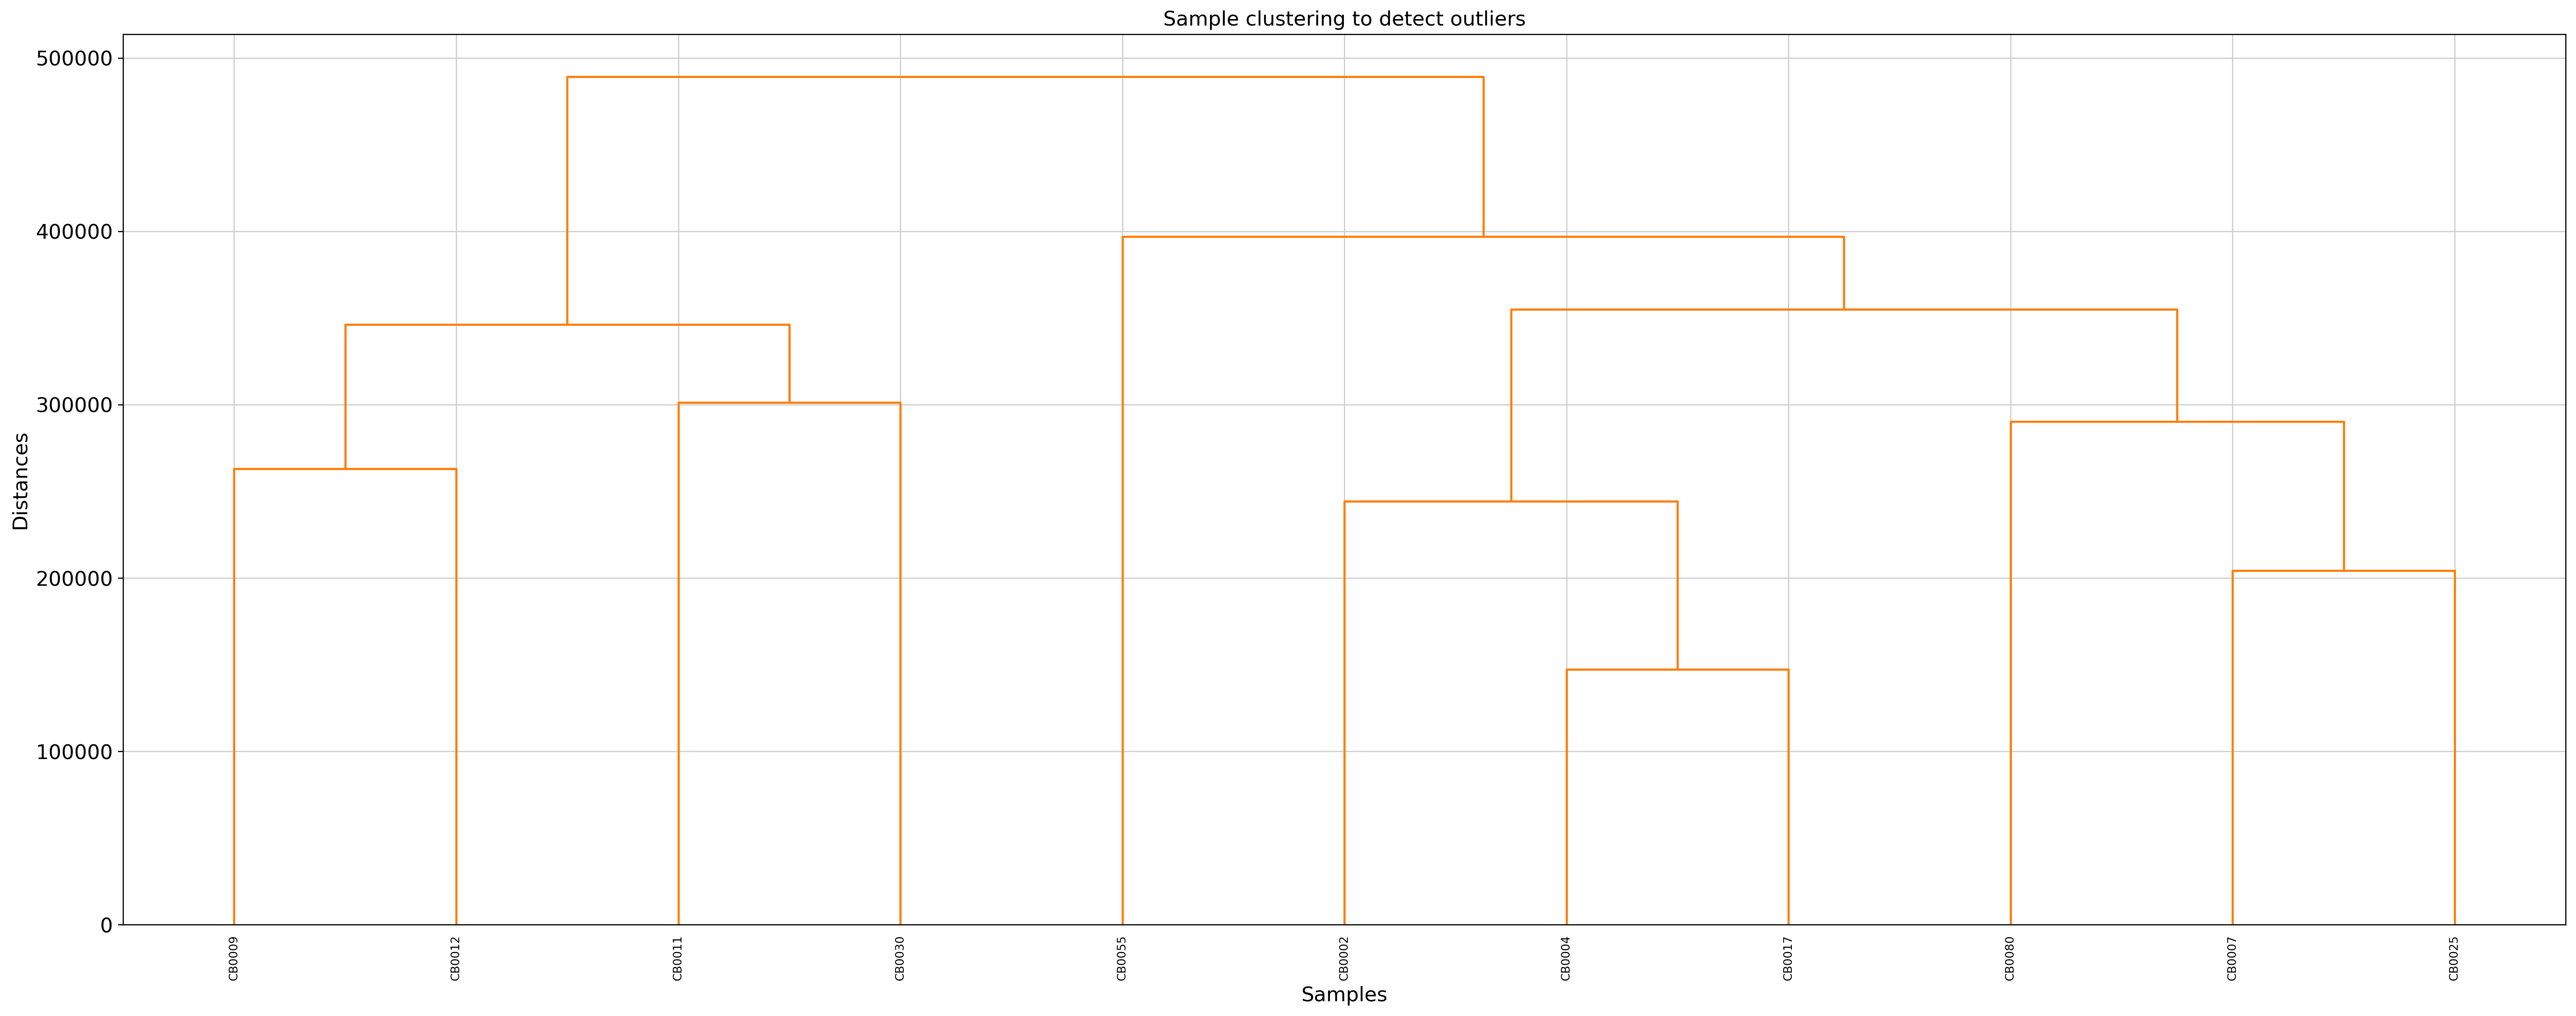

In [5]:
pyWGCNA.preprocess()

In [ ]:
pyWGCNA.goodSamplesGenes(geneExp, weights=None, minFraction=0.5, minNSamples=4, minNGenes=4, tol=None, minRelativeWeight=0.1)

If memory is still failing you, try setting the blockSize argument lower than what it calculates by default

Run pyWGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  4067
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.104581  -1.39325       0.739945  1574.710428  1512.172444   
1       2  0.398736  -2.01172       0.844168   678.934372   634.276063   
2       3  0.543081 -2.060224       0.891152   354.457309    320.62726   
3       4  0.669188 -2.149941       0.926193   207.913271   181.963157   
4       5  0.760432 -2.221767       0.949623    132.05833   112.059382   
5       6  0.808526 -2.272387       0.958284    88.913103    73.074665   
6       7  0.855075  -2.25272       0.971819    62.603317    49.744365   
7       8  0.874682 -2.253517       0.973526    45.673103    35.181143   
8       9  0.894293 -2.229336       0.980341    34.300616    25.529469   
9      10  0.904016 -2.209761       0.982407    26.388179    18.915728   
10     11  0.908306 -2.192242       0.979968    20.719199    14.287165   
11     

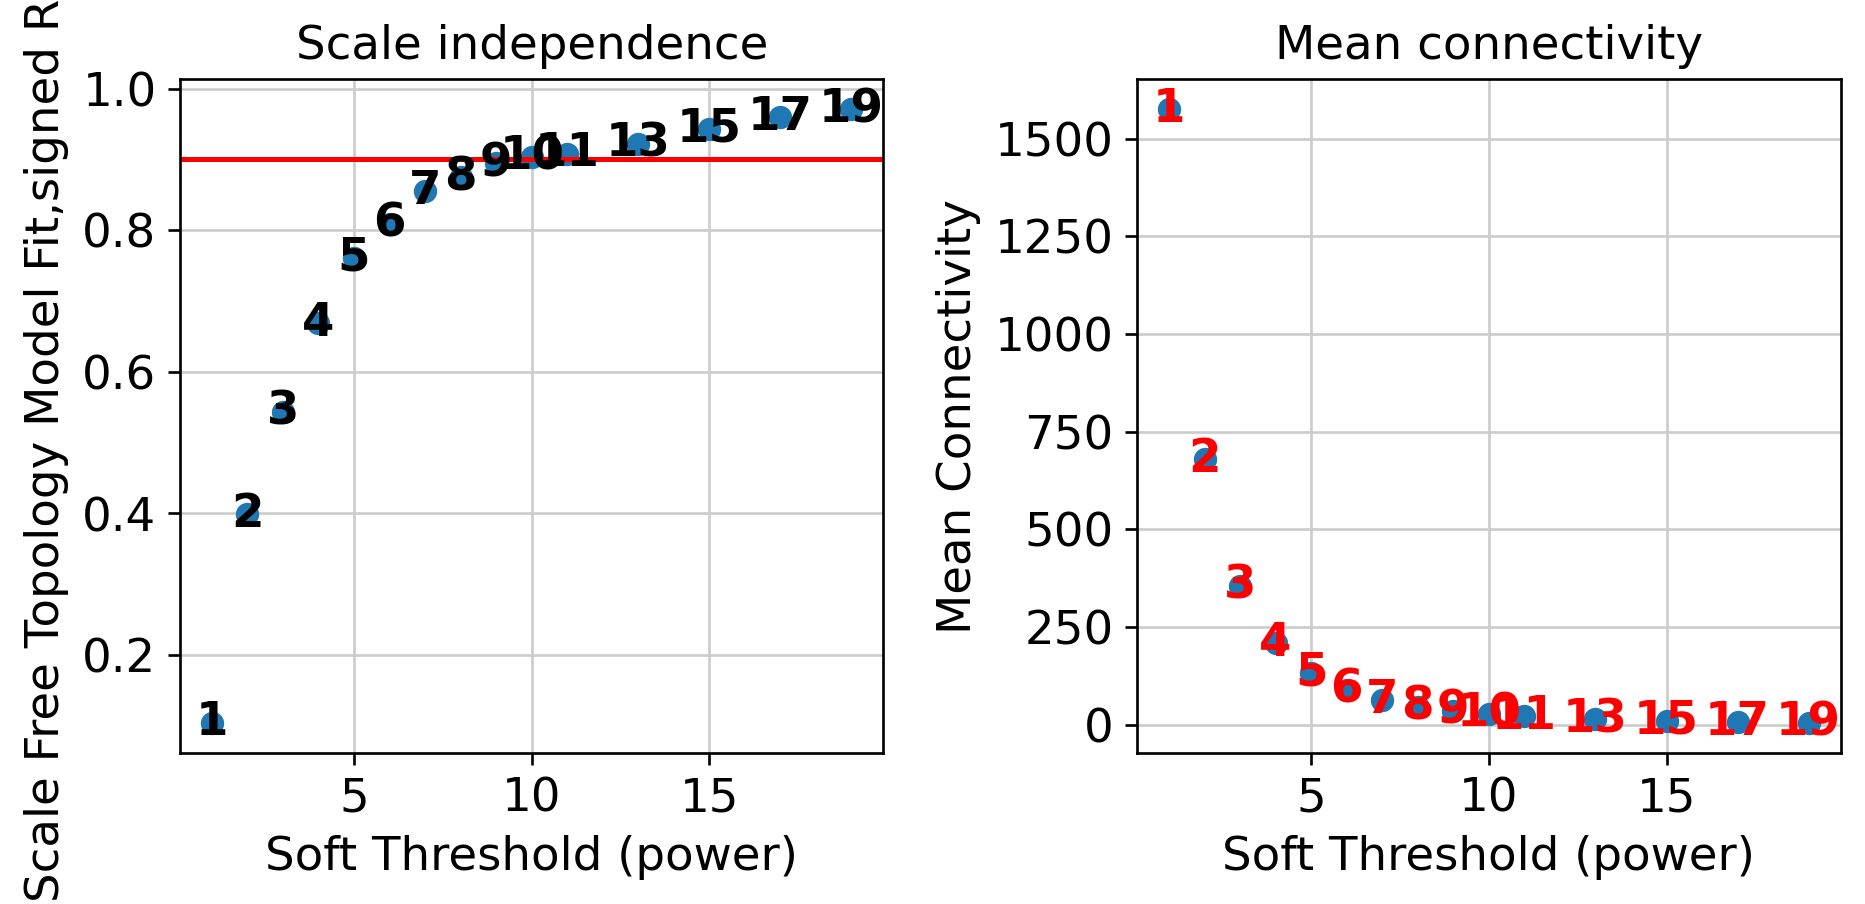

In [6]:
pyWGCNA.calculate_soft_threshold()

In [7]:
pyWGCNA.calculating_adjacency_matrix()

calculating adjacency matrix ...
	Done..



In [8]:
pyWGCNA.calculating_TOM_similarity_matrix()

calculating TOM similarity matrix ...
	Done..



Going through the merge tree...
..cutHeight not given, setting it to 0.996588689799769  ===>  99% of the (truncated) height range in dendro.
..done.
Calculating 60 module eigengenes in given set...
	Done..

mergeCloseModules: Merging modules whose distance is less than 0.2
fixDataStructure: data is not a Dictionary: converting it into one.
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 60 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 51 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 48 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 47 module eigengenes in given set...
	Done..

multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 46 module eigengenes in given set...
	Done..

  Calculating new MEs...
multiSetMEs: Calculating module MEs.
  Work

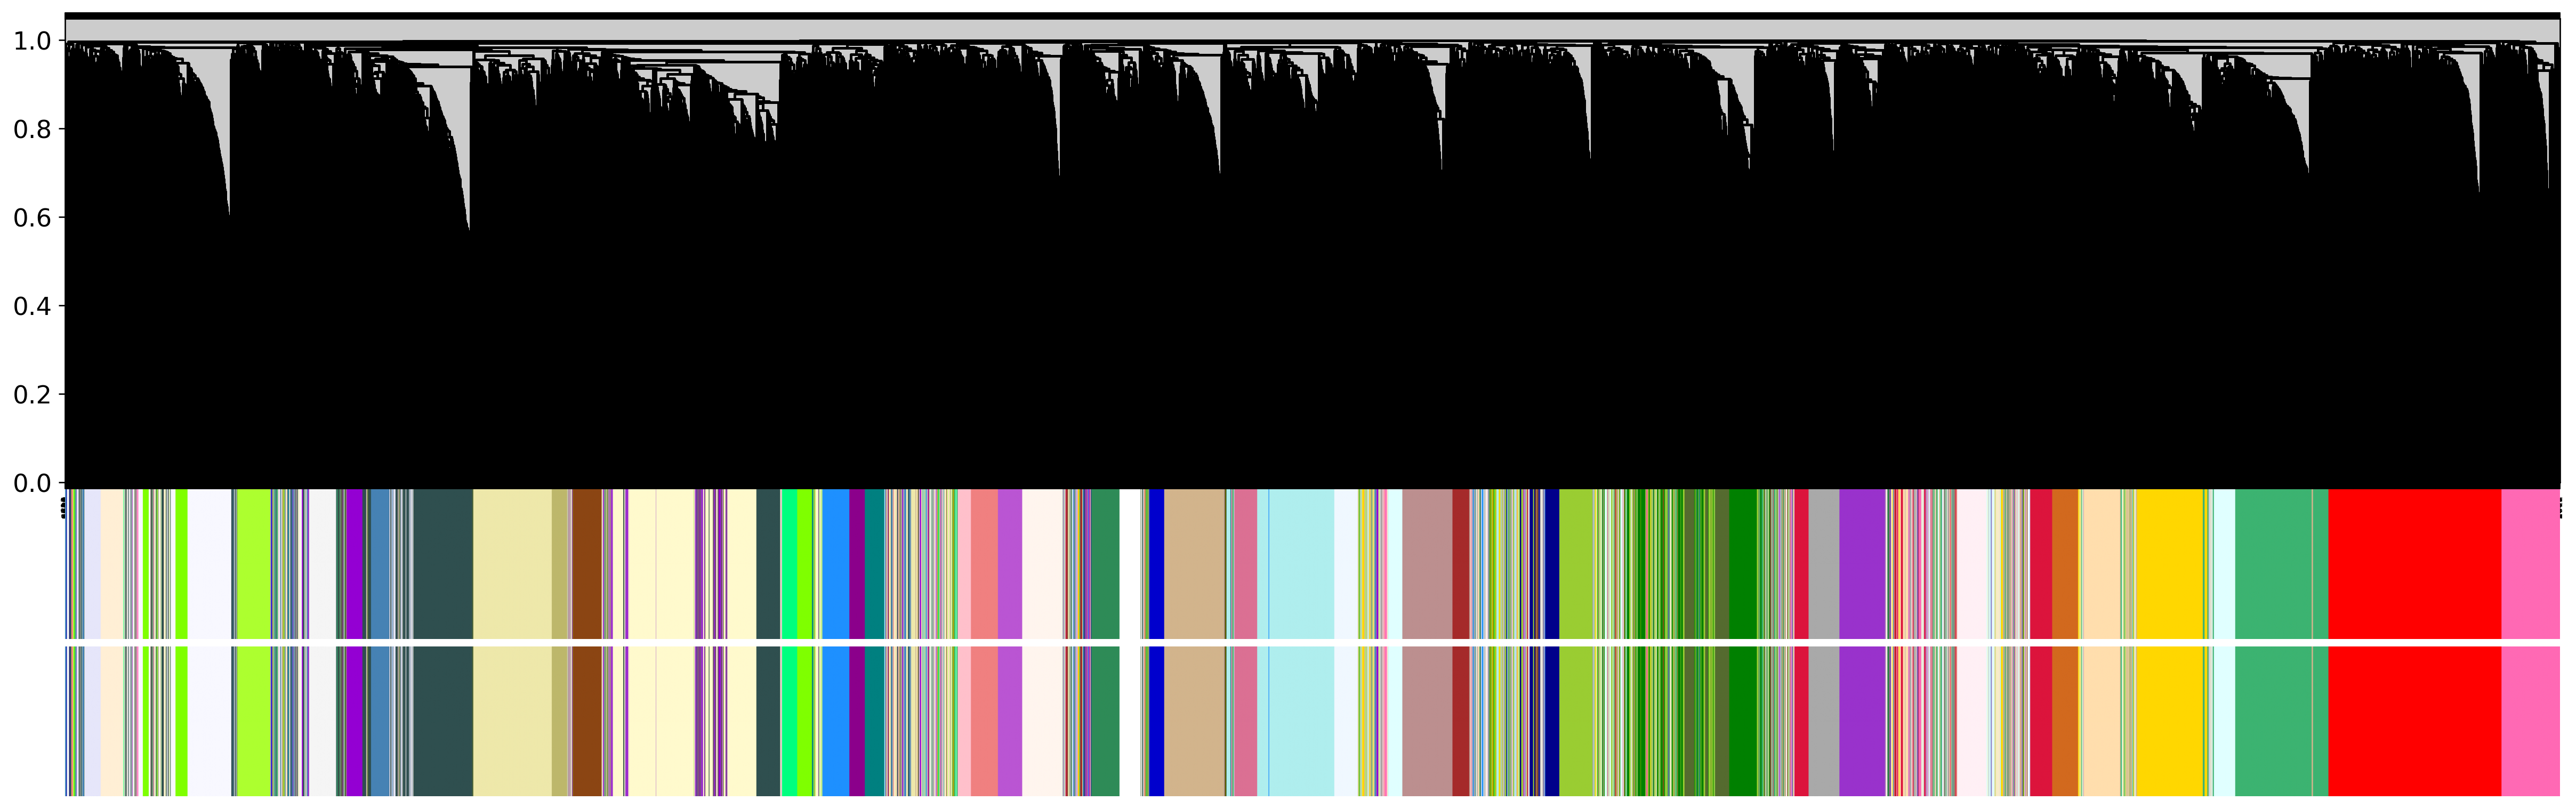

In [9]:
pyWGCNA.calculate_geneTree()
pyWGCNA.calculate_dynamicMods(kwargs_function={'cutreeHybrid': {'deepSplit': 2, 'pamRespectsDendro': False}})
pyWGCNA.calculate_gene_module(kwargs_function={'moduleEigengenes': {'softPower': 10}})

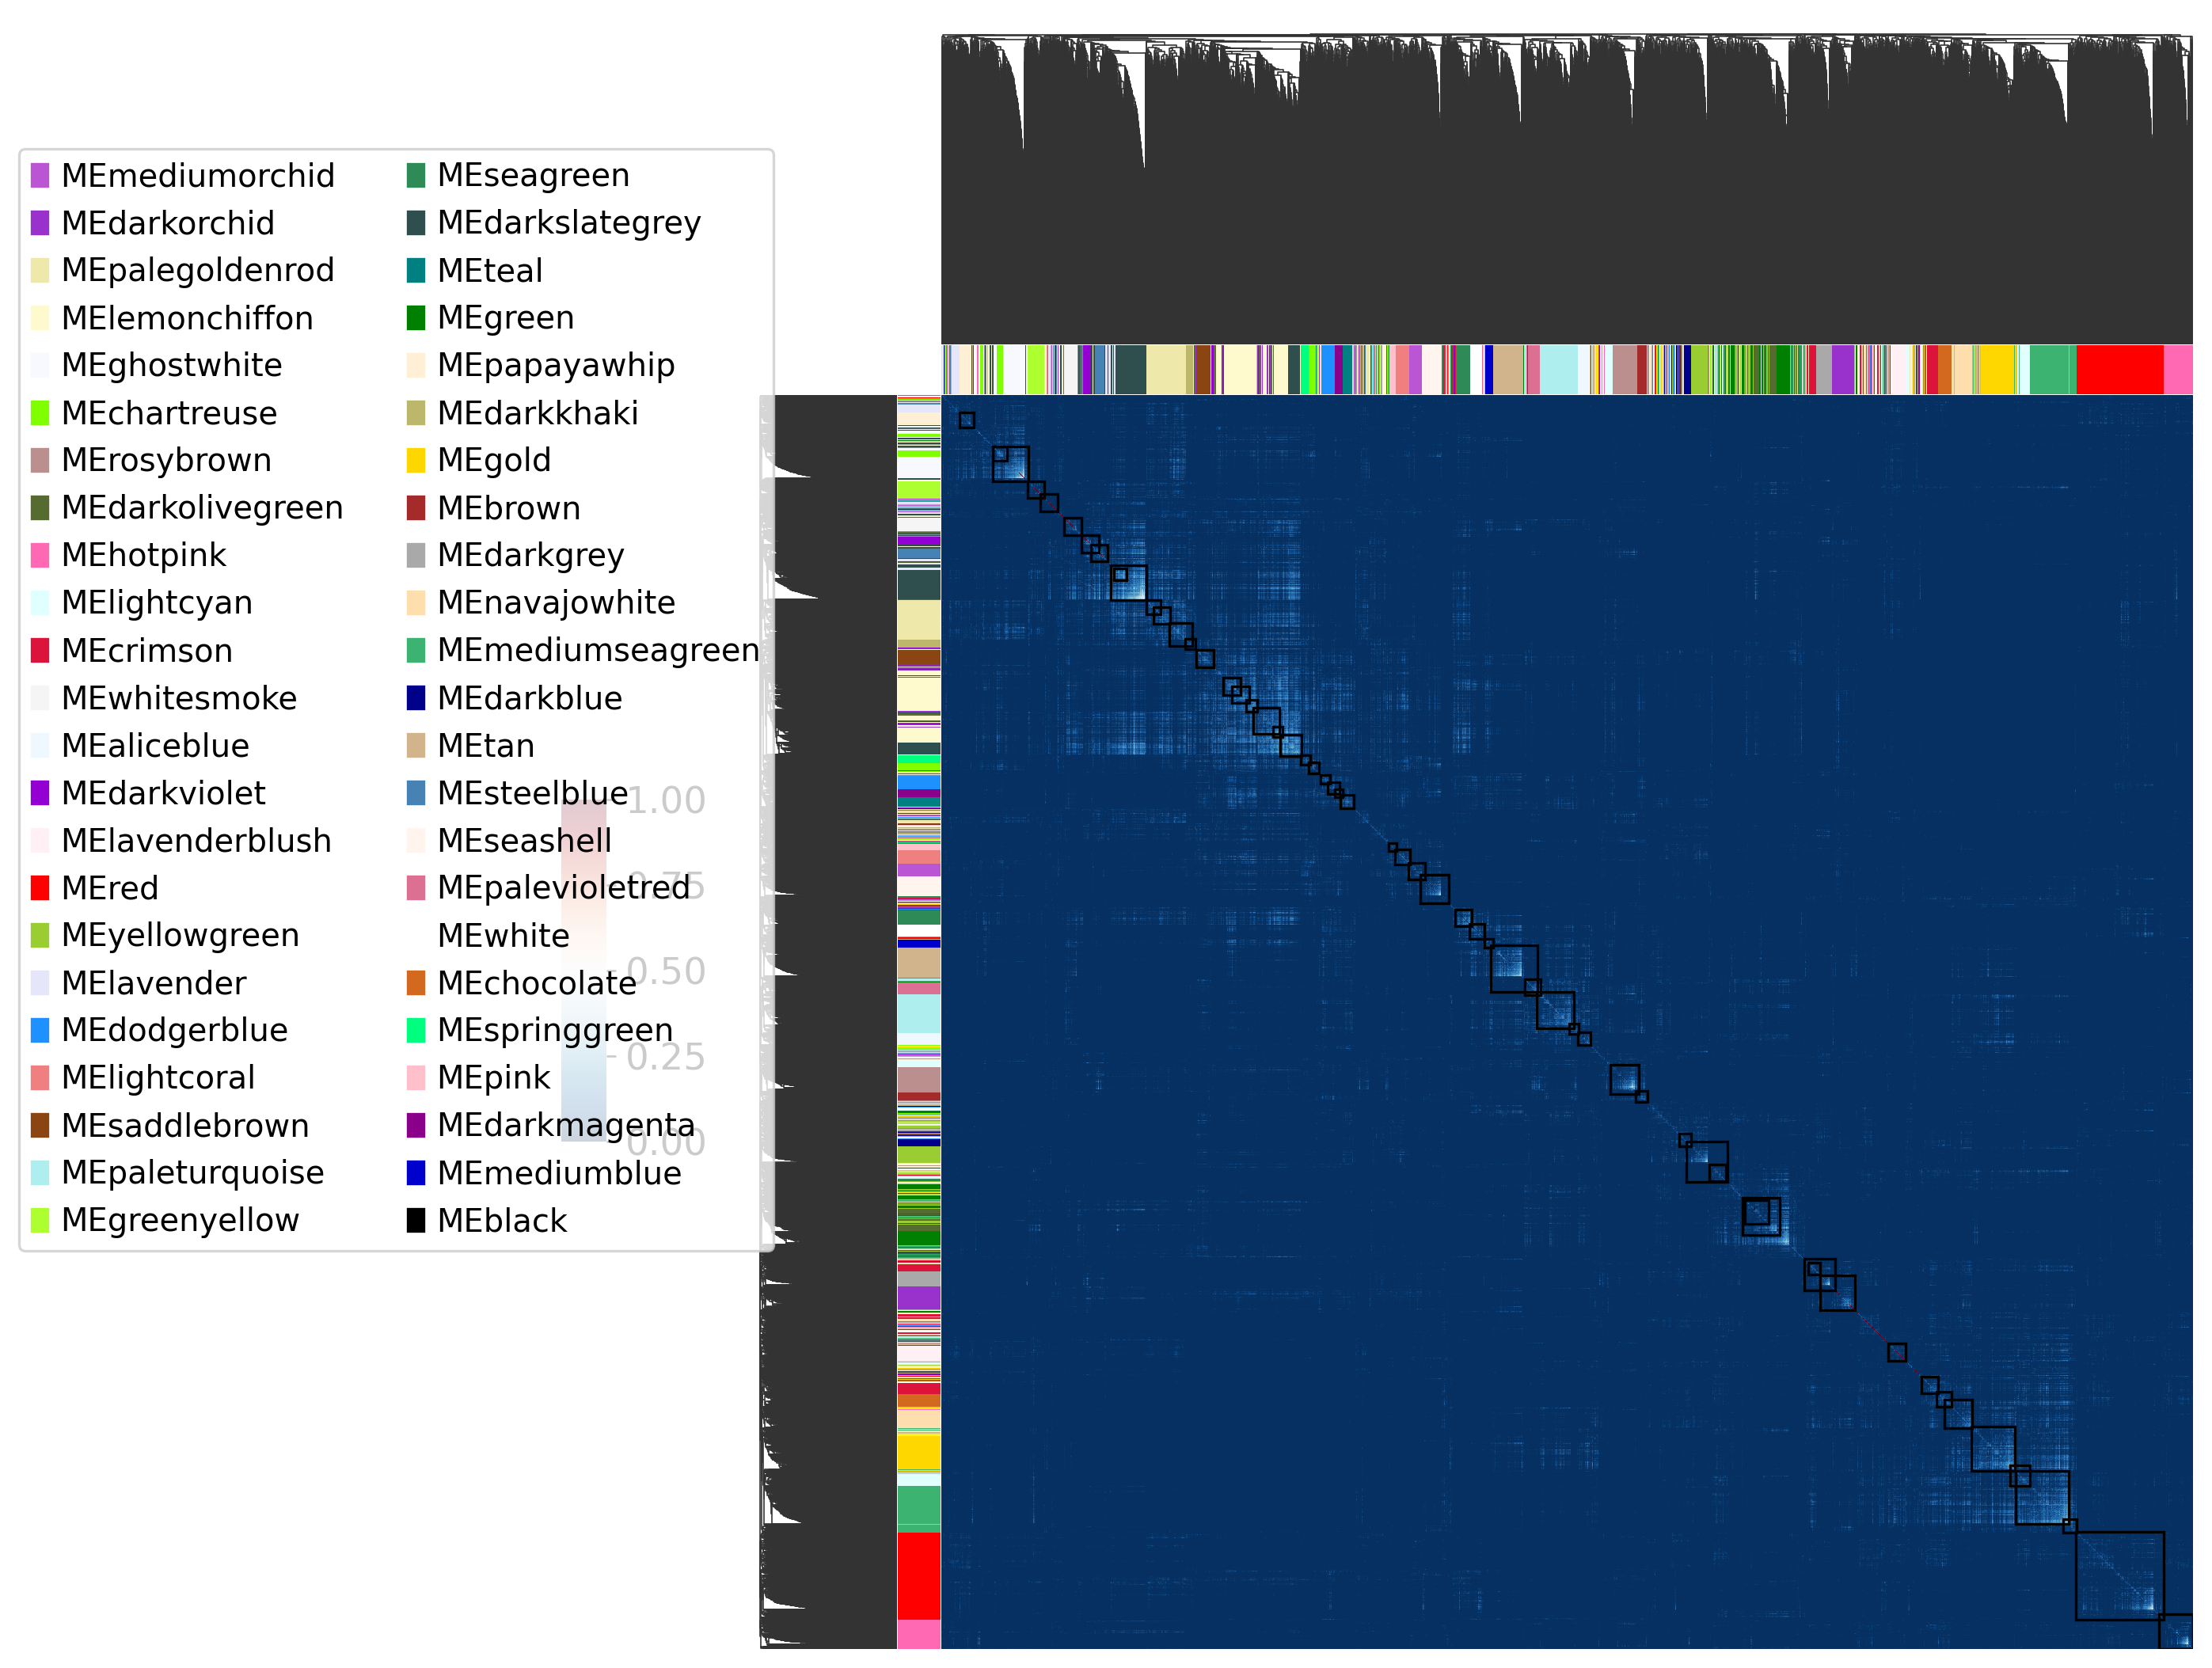

In [10]:
pyWGCNA.plot_matrix(save=False)

### Add colors for metadata

In [ ]:
meta = pd.read_csv('data/meta_CB.csv', index_col=0) # different meta for DM & GE
# select continuous variables
ga = meta['ga']
length = meta['newborn_length_cm']
muac = meta['newborn_muac_cm']

# Define a color gradient for each variable using matplotlib colormap
def get_colormap(values, cmap_name='coolwarm'):
    norm = plt.Normalize(min(values), max(values))
    cmap = plt.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a ScalarMappable object
    sm.set_array([])  # Empty array because ScalarMappable doesn't need data
    return sm
pyWGCNA.updateSampleInfo()
# Set colors for age and weight
ga_colors = get_colormap(ga, cmap_name='coolwarm')  # Color gradient for age
muac_colors = get_colormap(muac, cmap_name='viridis')  # Color gradient for weight
length_colors = get_colormap(length, cmap_name='plasma')

In [16]:
meta = pd.read_csv('data/meta_CB.csv', index_col=0) # different meta for DM & GE
meta = meta.drop(['newborn_length_cm','newborn_muac_cm','ga'], axis=1) # drop columns
meta

delivery     sex      bw
sample_id                           
CB0002        Normal    Male  normal
CB0004        Normal  Female  normal
CB0007     Caesarean  Female     low
CB0009     Caesarean    Male     low
CB0011     Caesarean  Female     low
CB0012     Caesarean  Female     low
CB0017     Caesarean    Male  normal
CB0025     Caesarean    Male  normal
CB0030        Normal    Male  normal
CB0055        Normal    Male     low
CB0080        Normal  Female  normal

In [17]:
pyWGCNA.updateSampleInfo(sampleInfo=meta) 
# pyWGCNA.updateSampleInfo(path='data/meta_CB.csv')
# add color for metadata
pyWGCNA.setMetadataColor('sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA.setMetadataColor('bw', {'normal': 'darkviolet',
                                            'low': 'deeppink'})
pyWGCNA.setMetadataColor('delivery', {'Normal': 'red',
                                          'Caesarean': 'blue'})
# pyWGCNA.setMetadataColor('ga', ga_colors)
# pyWGCNA.setMetadataColor('newborn_length_cm', length_colors)
# pyWGCNA.setMetadataColor('newborn_muac_cm', muac_colors)
pyWGCNA.geneExpr.obs

ga  newborn_length_cm  newborn_muac_cm   delivery     sex      bw
CB0002  37               58.0             10.0     Normal    Male  normal
CB0004  37               44.6              9.6     Normal  Female  normal
CB0007  35               43.0              9.1  Caesarean  Female     low
CB0009  36               49.0              9.7  Caesarean    Male     low
CB0011  36               46.0              9.1  Caesarean  Female     low
CB0012  37               48.0              8.3  Caesarean  Female     low
CB0017  38               45.6             10.5  Caesarean    Male  normal
CB0025  38               46.1             10.1  Caesarean    Male  normal
CB0030  39               49.2             11.0     Normal    Male  normal
CB0055  34               46.5              9.0     Normal    Male     low
CB0080  37               47.5              9.1     Normal  Female  normal

### Update gene information

In [18]:
geneList = PyWGCNA.getGeneList(dataset='hsapiens_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])

pyWGCNA.updateGeneInfo(geneList)

NameError: name 'PyWGCNA' is not defined

In [ ]:
pyWGCNA.geneExpr

In [19]:
pyWGCNA.figureType = 'png'

Analysing pyWGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..



'Done'

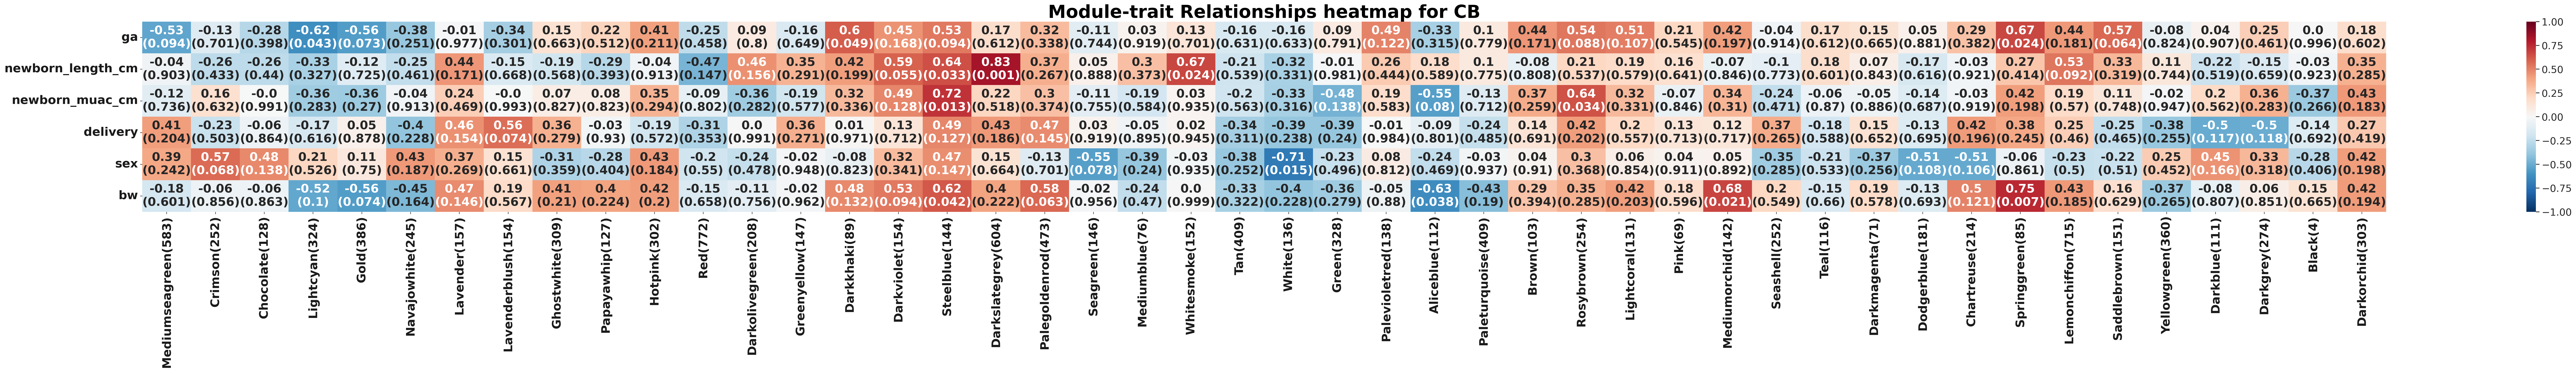

In [20]:
pyWGCNA.analyseWGCNA()

In [32]:
metadata = pyWGCNA.datExpr.obs.columns.tolist()
metadata

['ga', 'newborn_length_cm', 'newborn_muac_cm', 'delivery', 'sex', 'bw']

In [33]:
pyWGCNA.plotModuleEigenGene('Tan', metadata, show=True)

KeyError: 'ga'

In [ ]:
pyWGCNA.barplotModuleEigenGene('lightgreen', metadata, show=True)

In [21]:
print(f"Raw sample inforamtions:")
pyWGCNA.geneExpr.obs.head()

Raw sample inforamtions:


ga  newborn_length_cm  newborn_muac_cm   delivery     sex      bw
CB0002  37               58.0             10.0     Normal    Male  normal
CB0004  37               44.6              9.6     Normal  Female  normal
CB0007  35               43.0              9.1  Caesarean  Female     low
CB0009  36               49.0              9.7  Caesarean    Male     low
CB0011  36               46.0              9.1  Caesarean  Female     low

In [22]:
print(f"Raw gene inforamtions:")
pyWGCNA.geneExpr.var.head()

Raw gene inforamtions:


Empty DataFrame
Columns: []
Index: [ENSG00000000003, ENSG00000000419, ENSG00000000457, ENSG00000000460, ENSG00000000938]

In [23]:
print(f"Processed expresion data along with information:\n {pyWGCNA.datExpr}")

Processed expresion data along with information:
 AnnData object with n_obs × n_vars = 11 × 11000
    obs: 'ga', 'newborn_length_cm', 'newborn_muac_cm', 'delivery', 'sex', 'bw'
    var: 'dynamicColors', 'moduleColors', 'moduleLabels'


In [24]:
print(f"Raw sample inforamtions:")
pyWGCNA.datExpr.obs.head()

Raw sample inforamtions:


ga  newborn_length_cm  newborn_muac_cm   delivery     sex      bw
CB0002  37               58.0             10.0     Normal    Male  normal
CB0004  37               44.6              9.6     Normal  Female  normal
CB0007  35               43.0              9.1  Caesarean  Female     low
CB0009  36               49.0              9.7  Caesarean    Male     low
CB0011  36               46.0              9.1  Caesarean  Female     low

In [25]:
print(f"Raw gene inforamtions:")
pyWGCNA.datExpr.var.head()

Raw gene inforamtions:


dynamicColors   moduleColors  moduleLabels
ENSG00000000003   mediumorchid   mediumorchid            26
ENSG00000000419     darkorchid     darkorchid            11
ENSG00000000457     darkorchid     darkorchid            11
ENSG00000000460  palegoldenrod  palegoldenrod            29
ENSG00000000938   lemonchiffon   lemonchiffon            22

## Sub co-expression module
Sometimes we are interested in a gene, or a module of a pathway, and we need to extract the sub-modules of the gene for analysis and mapping. For example, we have selected two modules, 6 and 12, as sub-modules for analysis

In [37]:
sub_mol=pyWGCNA.get_sub_module(['gold','steelblue'],
                            mod_type='module_color')
sub_mol.head(),sub_mol.shape

(     ivl  module             name dynamo_color module_color
 72   639      32  ENSG00000053900    steelblue    steelblue
 73  2680      32  ENSG00000104972    steelblue    steelblue
 76  5428      32  ENSG00000130254    steelblue    steelblue
 77   544      32  ENSG00000047188    steelblue    steelblue
 78    95      32  ENSG00000005810    steelblue    steelblue,
 (530, 5))

We found a total of 530 genes for 'gold' and 'tan'. Next, we used the scale-free network constructed earlier, with the threshold set to 0.95, to construct a gene correlation network graph for modules 'gold' and 'lightgreen'

In [40]:
G_sub=pyWGCNA.get_sub_network(mod_list=['steelblue'],
                            mod_type='module_color',correlation_threshold=0.2)
G_sub

In [41]:
len(G_sub.edges())

45

(<Figure size 960x960 with 1 Axes>, <AxesSubplot: >)

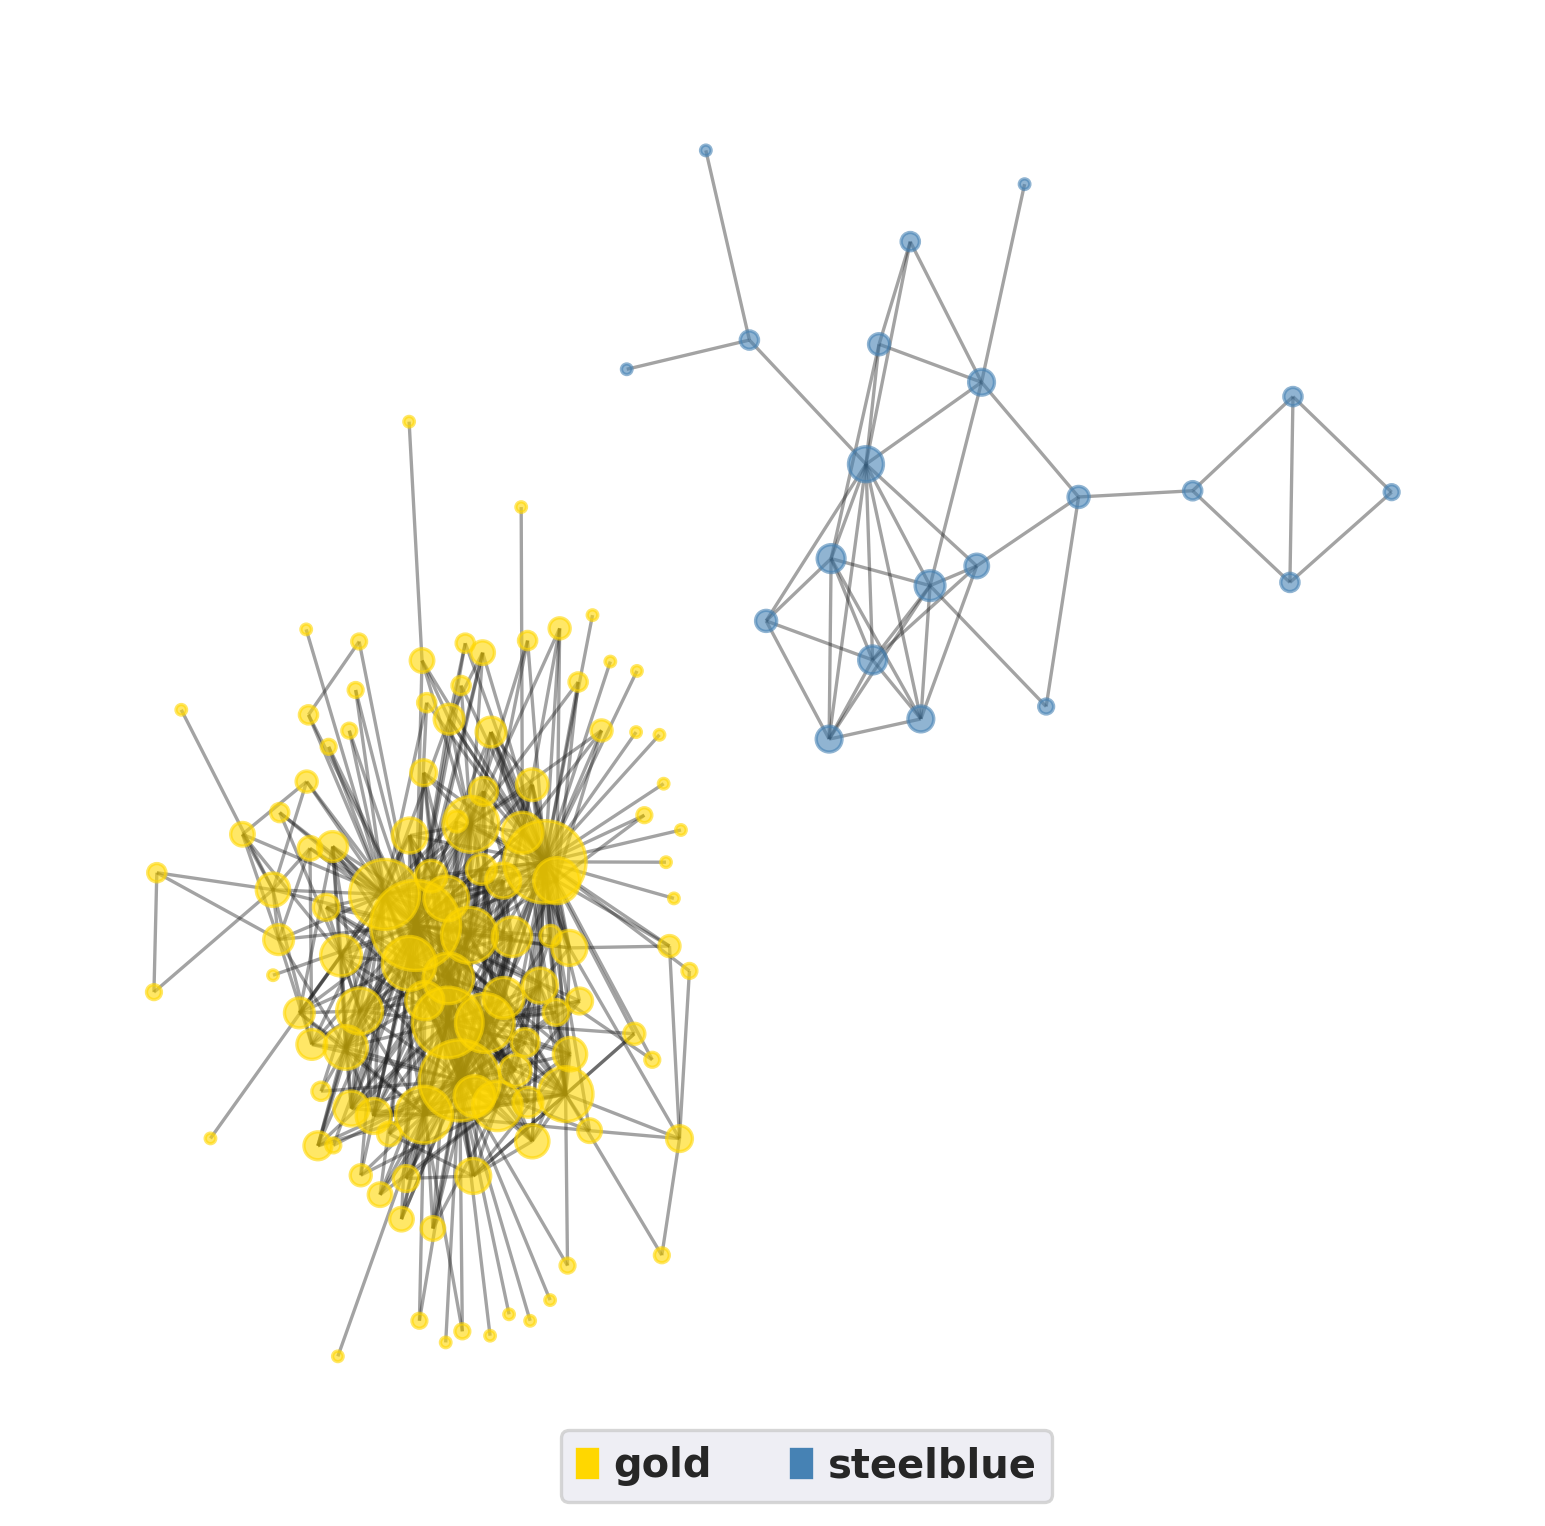

In [42]:
# visualise the gene-free network of our interest
pyWGCNA.plot_sub_network(['gold','steelblue'],pos_type='kamada_kawai',pos_scale=10,pos_dim=2,
                         figsize=(8,8),node_size=10,label_fontsize=8,correlation_threshold=0.2,
                         label_bbox={"ec": "white", "fc": "white", "alpha": 0.6})

## Finding Hub genes & Eignegenes for modules

May also find hub genes in each module based on their connectivity by using the `top_n_hub_genes()` function.

It will give dataframe sorted by connectivity along with the additional gene information you have in your metadata.

In [ ]:
pyWGCNA.datExpr.var.moduleColors.value_counts()

In [43]:
pyWGCNA.top_n_hub_genes(moduleName="steelblue", n=10)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
ENSG00000115380     19.572268     steelblue    steelblue            40
ENSG00000087245     19.435946     steelblue    steelblue            40
ENSG00000152377     19.171739     steelblue    steelblue            40
ENSG00000131386     18.427561     steelblue    steelblue            40
ENSG00000162458     17.928338     steelblue    steelblue            40
ENSG00000159251     17.855030     steelblue    steelblue            40
ENSG00000078401     17.823772     steelblue    steelblue            40
ENSG00000099260     16.989065     steelblue    steelblue            40
ENSG00000109472     16.163862     steelblue    steelblue            40
ENSG00000139567     15.875083     steelblue    steelblue            40

In [ ]:
# Calculate module eigengenes
module_eigengenes = pyWGCNA.MEs

# Save the module eigengenes to a CSV file
module_eigengenes.to_csv(f'{out_dir}/module_eigengenes_cb.csv')
module_eigengenes.head()

In [ ]:
# Access the module colors (or labels) and gene names
module_colors = pyWGCNA.datExpr.var['moduleColors']  # This contains module assignments for each gene
gene_names = pyWGCNA.datExpr.var['gene_name']  

# Combine gene names with their module colors/labels into a DataFrame
module_gene_df = pd.DataFrame({
    'Gene Name': gene_names,
    'Module Label': module_colors
})

# filter by a specific module, e.g., "lightcoral":
module_of_interest = "lightcoral"

# Filter the DataFrame for genes belonging to the "lightcoral" module
genes_of_interest = module_gene_df[module_gene_df['Module Label'] == module_of_interest]

# Print the filtered DataFrame
print(genes_of_interest)

# Save to CSV for further use
#genes_of_interest.to_csv(f'{out_dir}/lightcoral_genes.csv')

In [ ]:
# Extract row names (gene IDs) from 'gene_of_interest' (which are the index of this dataframe)
genes_IDs = genes_of_interest.index.tolist()  # This is the list of gene IDs

# Subset 'normalized_counts' based on the gene IDs (row names)
expr_of_interest = geneExp_raw.loc[genes_IDs]

expr_of_interest.to_csv(f'{out_dir}/lightcoral_subset_exp.csv')
expr_of_interest

In [ ]:
# Extract module labels and gene names
module_names = pyWGCNA.datExpr.var['moduleColors']  # or 'moduleLabels'
gene_names = pyWGCNA.datExpr.var['gene_name']
gene_biotype = pyWGCNA.datExpr.var['gene_biotype']

# Create a DataFrame with module labels and corresponding gene names
module_gene_df = pd.DataFrame({
    'Gene Name': gene_names,
    'Gene Biotype': gene_biotype,
    'Module Color': module_names
})

# can sort by the module labels to organize the data
module_gene_df = module_gene_df.sort_values(by='Module Color')

# Save the DataFrame to a CSV file
module_gene_df.to_csv(f'{out_dir}/module_gene_assignments_CB_GE.csv', index=False)

In [2]:
#pyWGCNA = PyWGCNA.readWGCNA("GE_CB.p")

Reading CB WGCNA done!
